In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

palette = sns.color_palette("colorblind")

In [247]:
df = pd.read_csv("experiment_results.csv")
df.columns

Index(['filename', ' concept', ' elCounter', ' elkCounter',
       ' elELapsedTimeInMilliseconds', ' elkELapsedTimeInMilliseconds',
       ' hermitCounter', ' hermitELapsedTimeInMilliseconds'],
      dtype='object')

In [248]:
counter_statistics  = df.groupby(by='filename')[[' elCounter', ' elkCounter', ' hermitCounter']].mean().reset_index()
counter_statistics[counter_statistics['filename'] == 'salad_bar.owx'][[' elCounter', ' elkCounter', ' hermitCounter']].values
counter_statistics

# counter_statistics  = df.groupby(by='filename')[[' concept']].count()
# melt =  pd.melt(counter_statistics, id_vars="filename", var_name="CounterType", value_name="Value")
# melt

,filename,elCounter,elkCounter,hermitCounter
0,OWL_1,5.314286,5.314286,5.314286
1,OWL_2,9.574468,9.574468,9.574468
2,OWL_3,7.970862,7.970862,7.970862
3,OWL_4,3.304348,4.565217,4.586957
4,OWL_5,5.636364,8.212121,9.040404
5,salad_bar.owx,4.706897,4.879310,5.068966


In [249]:
melted_df = pd.melt(counter_statistics, id_vars="filename", var_name="CounterType", value_name="Value")
melted_df


,filename,CounterType,Value
0,OWL_1,elCounter,5.314286
1,OWL_2,elCounter,9.574468
2,OWL_3,elCounter,7.970862
3,OWL_4,elCounter,3.304348
4,OWL_5,elCounter,5.636364
5,salad_bar.owx,elCounter,4.706897
6,OWL_1,elkCounter,5.314286
7,OWL_2,elkCounter,9.574468
8,OWL_3,elkCounter,7.970862
9,OWL_4,elkCounter,4.565217


/var/folders/1d/yj549hgd2xq52yvm78rh_b900000gn/T/ipykernel_67152/29546648.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.barplot(data=melted_df, x="filename", y="Value", hue="CounterType", palette=palette, alpha=.8)


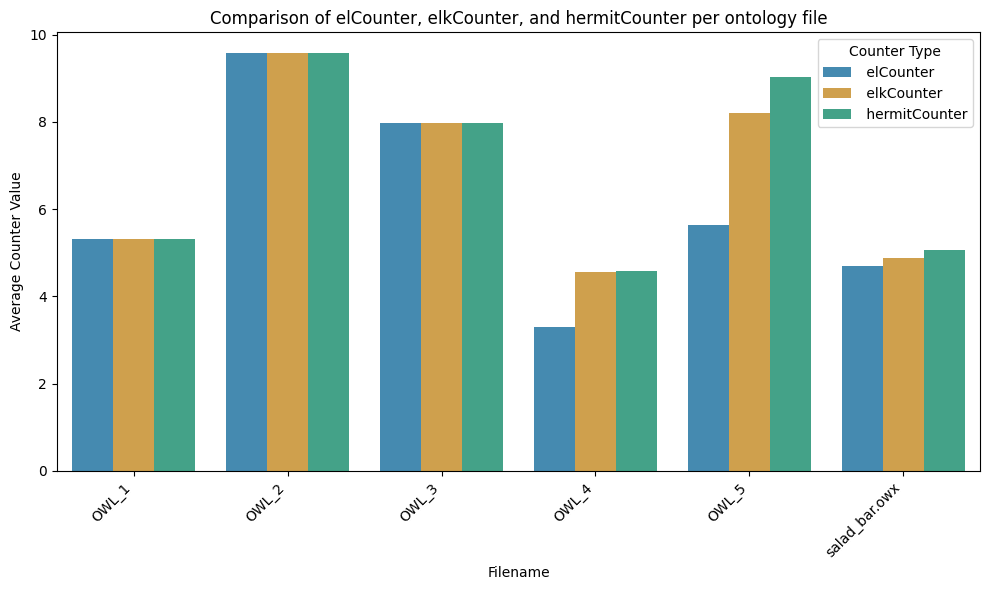

<Figure size 640x480 with 0 Axes>

In [250]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=melted_df, x="filename", y="Value", hue="CounterType", palette=palette, alpha=.8)
plt.title("Comparison of elCounter, elkCounter, and hermitCounter per ontology file")
plt.xlabel("Filename")
plt.ylabel("Average Counter Value")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Counter Type")
plt.tight_layout()
plt.show()
plt.savefig("output.pdf")

In [251]:
el_avg = df[" elELapsedTimeInMilliseconds"].mean()
elk_avg = df[" elkELapsedTimeInMilliseconds"].mean()
hermit_avg = df[" hermitELapsedTimeInMilliseconds"].mean()

plot_data = pd.DataFrame({
    "ElapsedTimeType": ["EL Reasoner", "ELK Reasoner", "Hermit Reasoner"],
    "AverageTime": [el_avg, elk_avg, hermit_avg]
})

/var/folders/1d/yj549hgd2xq52yvm78rh_b900000gn/T/ipykernel_67152/1802574713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x="ElapsedTimeType", y="AverageTime", palette=palette, width=0.4)
/var/folders/1d/yj549hgd2xq52yvm78rh_b900000gn/T/ipykernel_67152/1802574713.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=plot_data, x="ElapsedTimeType", y="AverageTime", palette=palette, width=0.4)


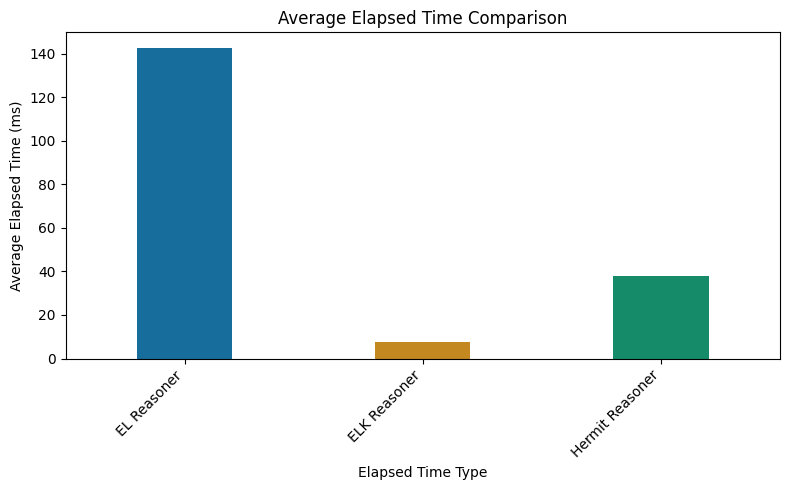

<Figure size 640x480 with 0 Axes>

In [252]:
plt.figure(figsize=(8, 5))
sns.barplot(data=plot_data, x="ElapsedTimeType", y="AverageTime", palette=palette, width=0.4)
plt.title("Average Elapsed Time Comparison")
plt.xlabel("Elapsed Time Type")
plt.ylabel("Average Elapsed Time (ms)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
plt.savefig("output.png", dpi=300)


In [253]:
stats = {
    "Metric": ["Max", "Min", "Average"],
    "EL": [
        df[" elELapsedTimeInMilliseconds"].max(),
        df[" elELapsedTimeInMilliseconds"].min(),
        df[" elELapsedTimeInMilliseconds"].mean()
    ],
    "ELK": [
        df[" elkELapsedTimeInMilliseconds"].max(),
        df[" elkELapsedTimeInMilliseconds"].min(),
        df[" elkELapsedTimeInMilliseconds"].mean()
    ],
    "Hermit": [
        df[" hermitELapsedTimeInMilliseconds"].max(),
        df[" hermitELapsedTimeInMilliseconds"].min(),
        df[" hermitELapsedTimeInMilliseconds"].mean()
    ]
}

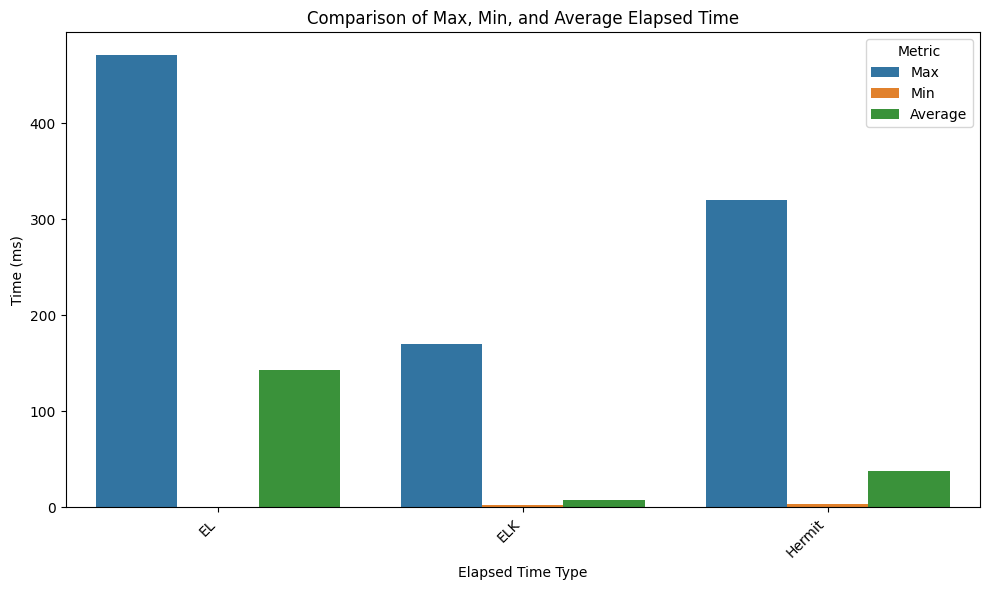

In [254]:
stats_df = pd.DataFrame(stats)

# Melt the DataFrame for seaborn compatibility
melted_stats_df = pd.melt(
    stats_df, id_vars="Metric",
    var_name="ElapsedTimeType", value_name="Value"
)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_stats_df, x="ElapsedTimeType", y="Value", hue="Metric")
plt.title("Comparison of Max, Min, and Average Elapsed Time")
plt.xlabel("Elapsed Time Type")
plt.ylabel("Time (ms)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

In [259]:
df[" elkkELapsedTimeInMilliseconds"].min()

KeyError: ' elkkELapsedTimeInMilliseconds'